# Import necessary modules

In [1]:

%pip install scikit-learn
%pip install wordcloud
%pip install seaborn
%pip install matplotlib
%pip install pandas
%pip install ta_lib-0.6.3-cp313-cp313-win_amd64.whl

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Processing c:\10 academy ai mastery\financial-news-sentiment-analysis\notebooks\ta_lib-0.6.3-cp313-cp313-win_amd64.whl
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\10 Academy AI Mastery\\financial-news-sentiment-analysis\\notebooks\\ta_lib-0.6.3-cp313-cp313-win_amd64.whl'


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Add the parent directory to sys.path

In [23]:
import pandas as pd
import os
import sys
# Get the absolute path to the src directory
src_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'src'))
parent_dir = os.path.dirname(src_path)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Now try to import the module
from src.quant_analysis_module import *


# Load All Stocks Datas and Perform Financial Analysis

In [24]:
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
start_date = "2023-01-01"
end_date = "2024-01-01"
# Optional: Store each DataFrame in a dictionary for access by ticker
stock_data = {}

for ticker in tickers:
    filepath = f'../data/yfinance_data/{ticker}_historical_data.csv'
    df = load_stock_data(filepath)
    stock_data[ticker] = df  # Save it to dictionary

    # Optional: print or inspect
    print(f"{ticker} data loaded: {df.shape[0]} rows")


AAPL data loaded: 10998 rows
AMZN data loaded: 6846 rows
GOOG data loaded: 5020 rows
META data loaded: 2926 rows
MSFT data loaded: 9672 rows
NVDA data loaded: 6421 rows
TSLA data loaded: 3545 rows


In [13]:
for ticker in tickers:
    df = stock_data[ticker]
    print(f"\n===== {ticker} Head =====")
    print(df.head())



===== AAPL Head =====
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

            Dividends  Stock Splits  SMA_20  SMA_50  RSI  MACD  MACD_Signal  \
Date                                                                          
1980-12-12        0.0           0.0     NaN     NaN  NaN   NaN          NaN   
1980-12-15        0.0           0.0     NaN     NaN  NaN   NaN          NaN   
1980-12-16        0.0           0.0     NaN     NaN  NaN   NaN          NaN   
1980-12-17        0.0           0.0     NaN     N

In [14]:
for ticker in tickers:
    df = stock_data[ticker]
    print(f"\n===== {ticker} Info =====")
    df.info()



===== AAPL Info =====
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10998 entries, 1980-12-12 to 2024-07-30
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10998 non-null  float64
 1   High          10998 non-null  float64
 2   Low           10998 non-null  float64
 3   Close         10998 non-null  float64
 4   Adj Close     10998 non-null  float64
 5   Volume        10998 non-null  int64  
 6   Dividends     10998 non-null  float64
 7   Stock Splits  10998 non-null  float64
 8   SMA_20        10979 non-null  float64
 9   SMA_50        10949 non-null  float64
 10  RSI           10984 non-null  float64
 11  MACD          10965 non-null  float64
 12  MACD_Signal   10965 non-null  float64
 13  MACD_Hist     10965 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 1.3 MB

===== AMZN Info =====
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6846 entries, 1997-05-15 to 2024-07-

In [15]:
for ticker in tickers:
    df = stock_data[ticker]

    print(f"\n===== {ticker} Description =====")
    print(df.describe())



===== AAPL Description =====
               Open          High           Low         Close     Adj Close  \
count  10998.000000  10998.000000  10998.000000  10998.000000  10998.000000   
mean      22.299160     22.539055     22.068367     22.312754     21.494496   
std       46.003685     46.496031     45.540929     46.037660     45.561916   
min        0.049665      0.049665      0.049107      0.049107      0.037857   
25%        0.299107      0.303710      0.290179      0.298549      0.241840   
50%        0.531250      0.537946      0.522321      0.531250      0.432079   
75%       20.204196     20.389554     19.998036     20.196160     17.253029   
max      236.479996    237.229996    233.089996    234.820007    234.548523   

             Volume     Dividends  Stock Splits        SMA_20        SMA_50  \
count  1.099800e+04  10998.000000  10998.000000  10979.000000  10949.000000   
mean   3.180806e+08      0.000752      0.001546     22.157875     21.923676   
std    3.354523e+08  

In [10]:
# Apply TA indicators for each ticker
for ticker in tickers:
    df = stock_data[ticker]
    df = apply_ta_indicators(df)
    stock_data[ticker] = df  # Save updated DataFrame back
    print(f"TA indicators applied for {ticker}")


TA indicators applied for AAPL
TA indicators applied for AMZN
TA indicators applied for GOOG
TA indicators applied for META
TA indicators applied for MSFT
TA indicators applied for NVDA
TA indicators applied for TSLA



Visualizing indicators for AAPL


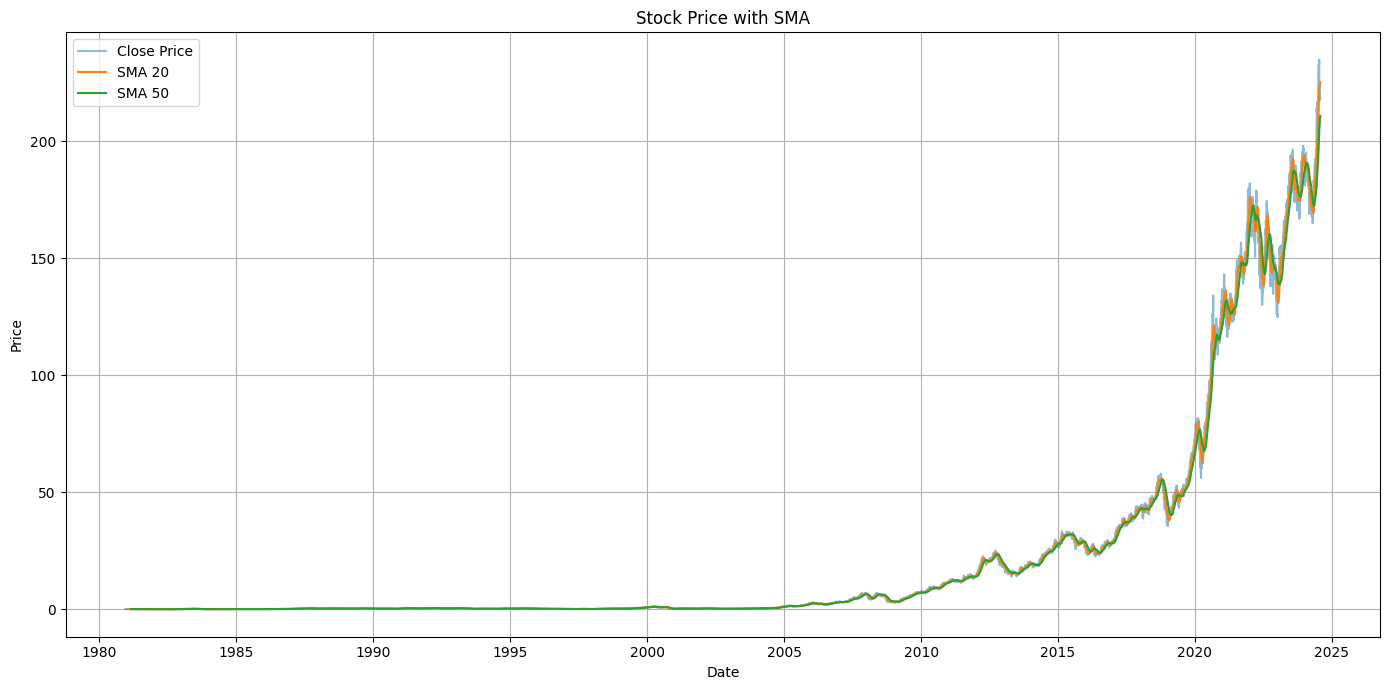

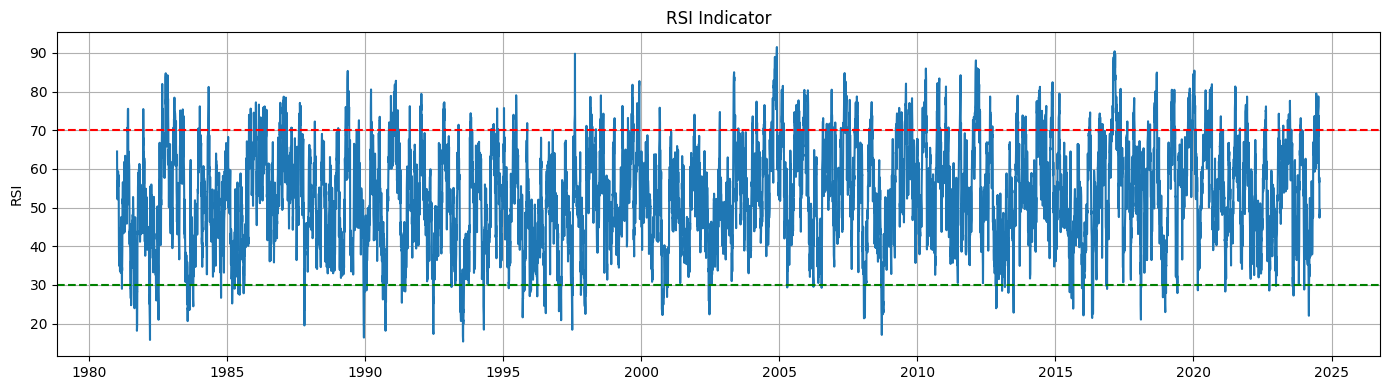

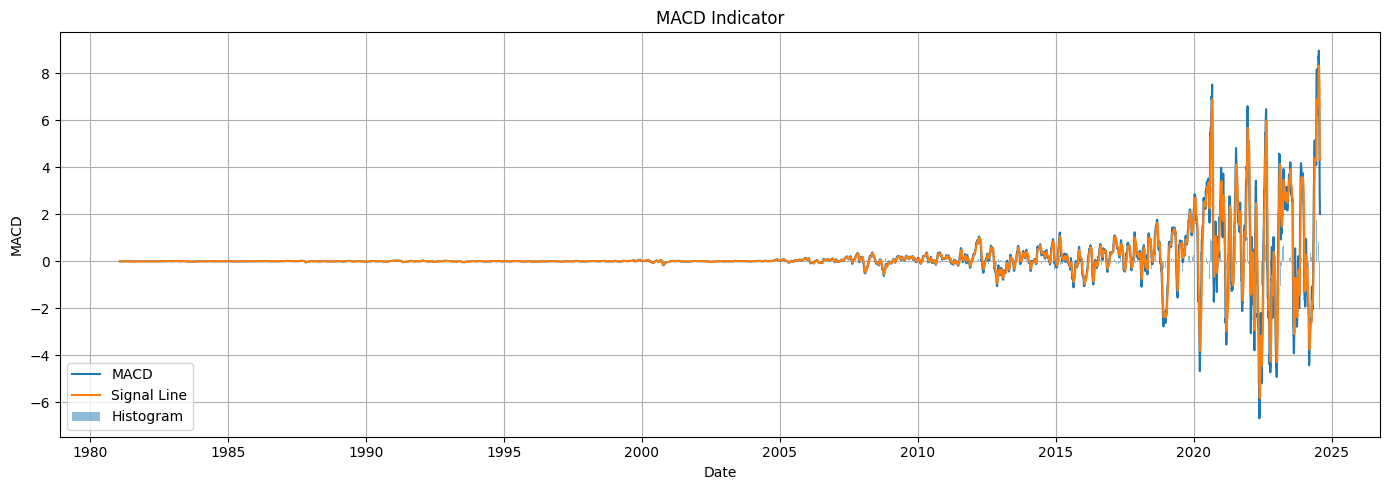


Visualizing indicators for AMZN


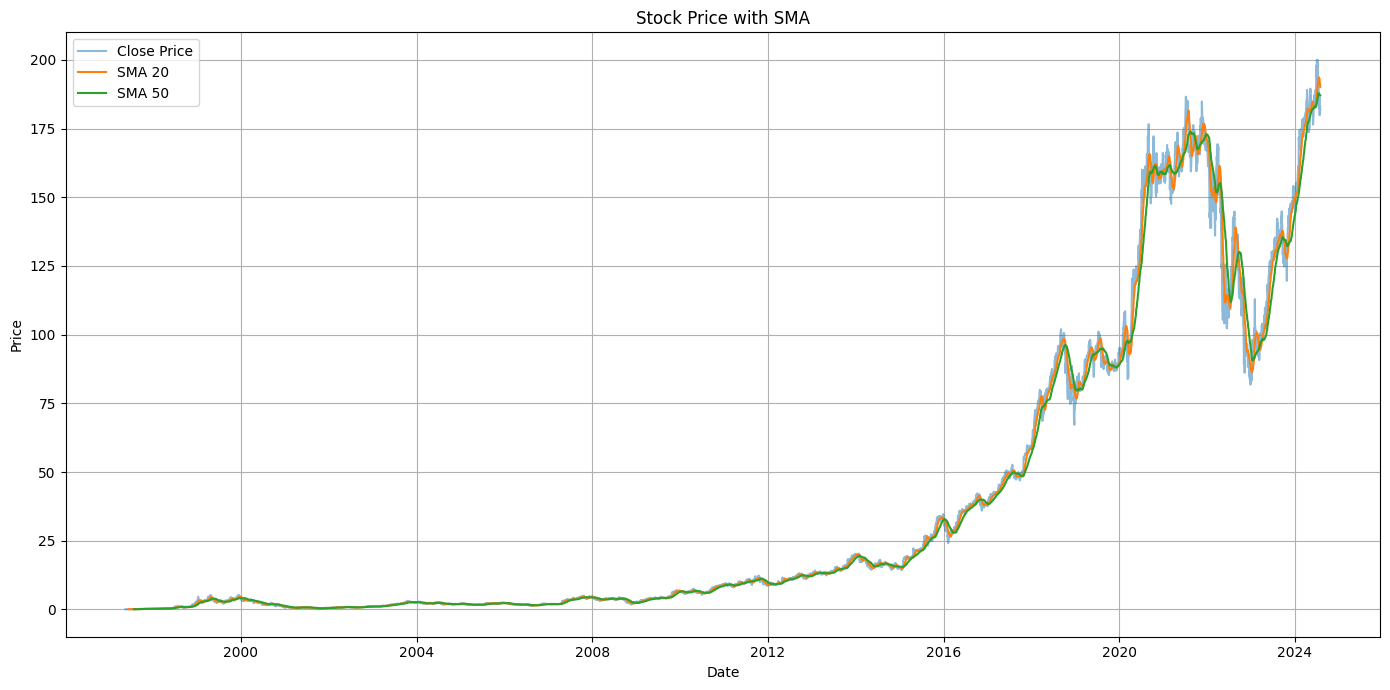

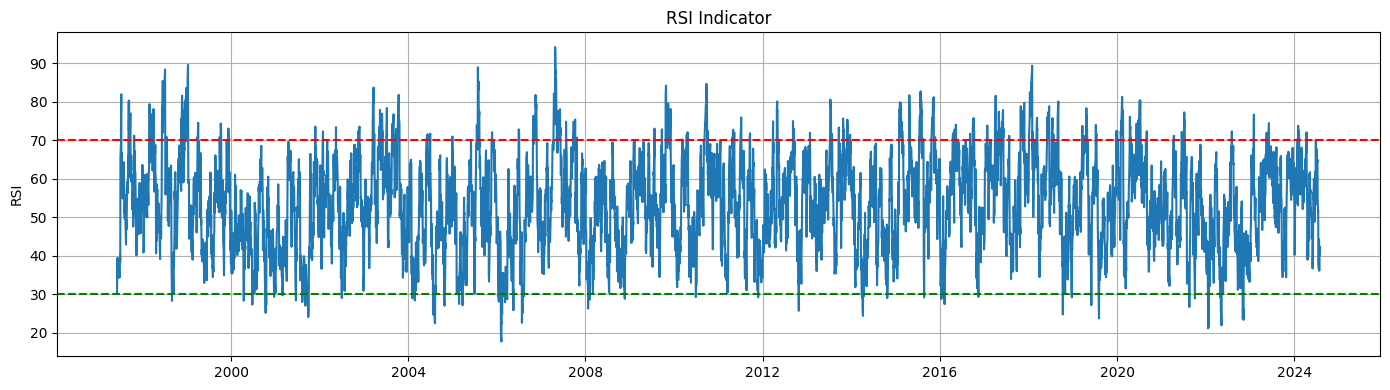

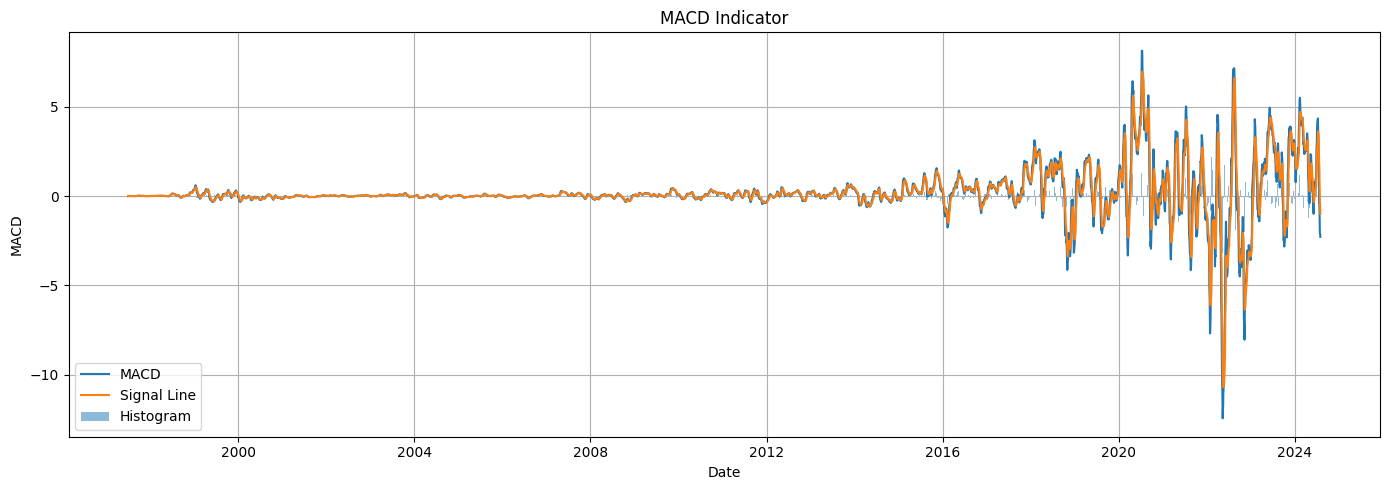


Visualizing indicators for GOOG


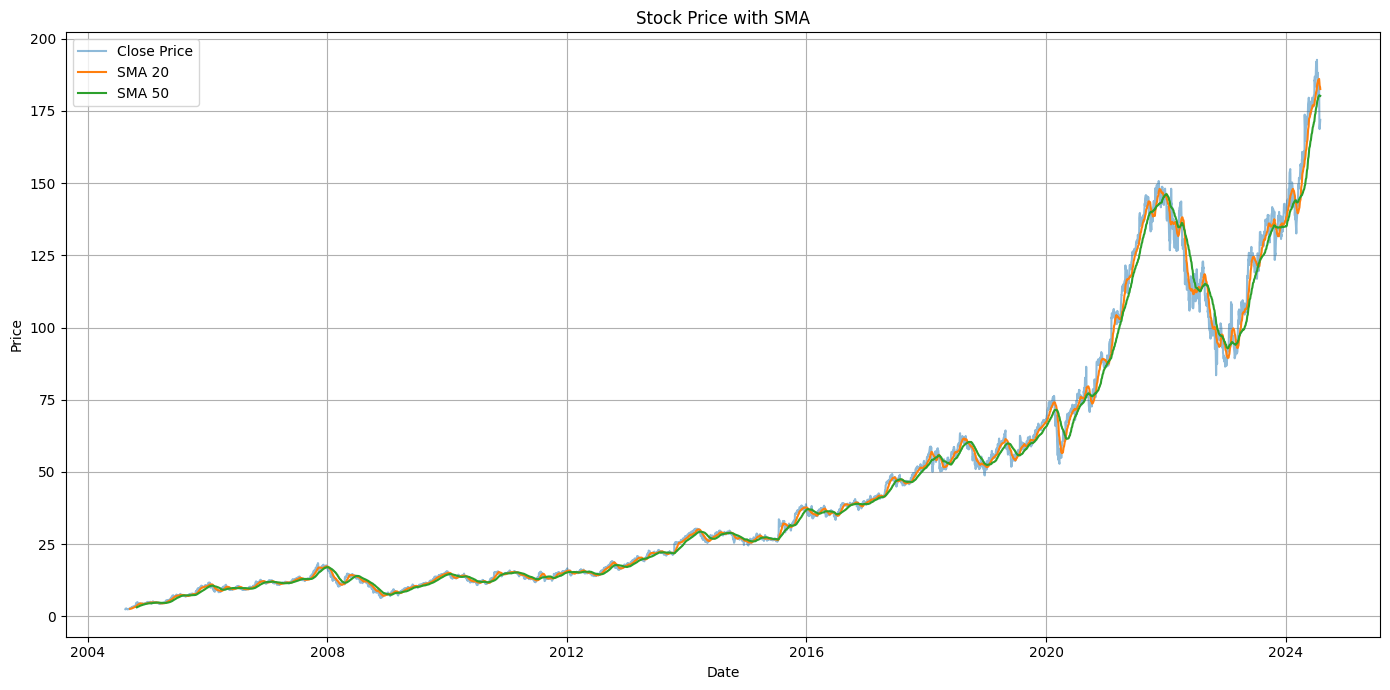

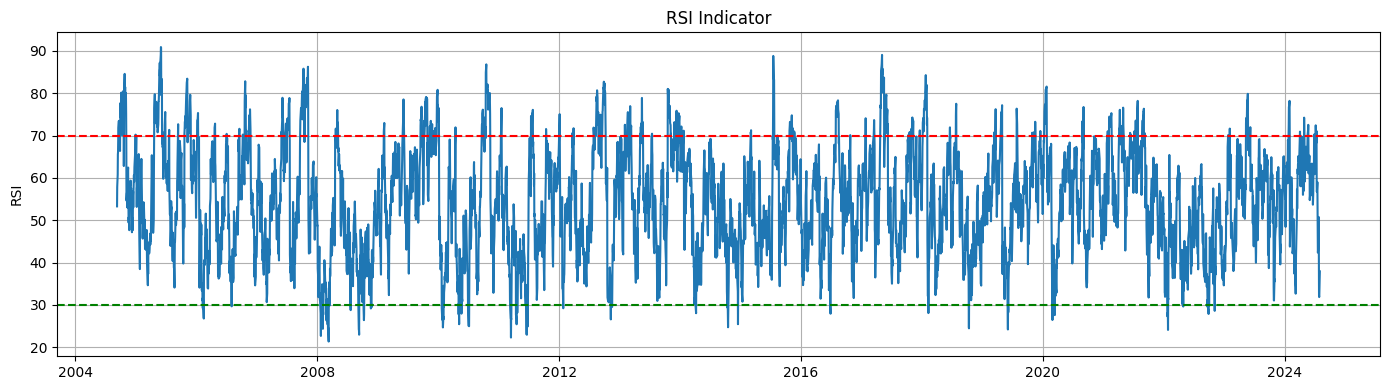

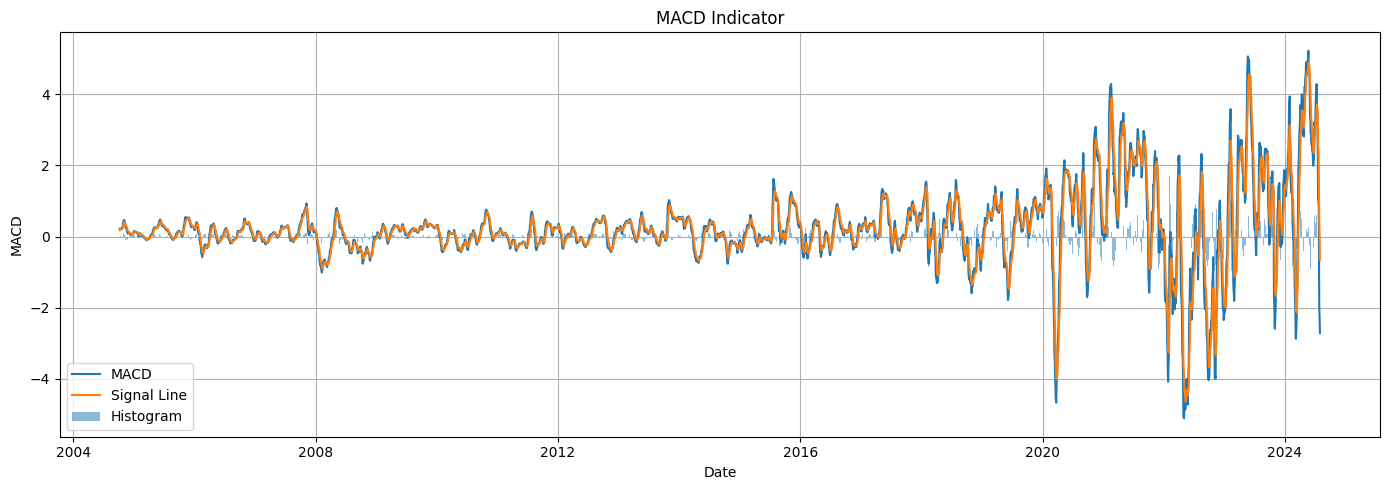


Visualizing indicators for META


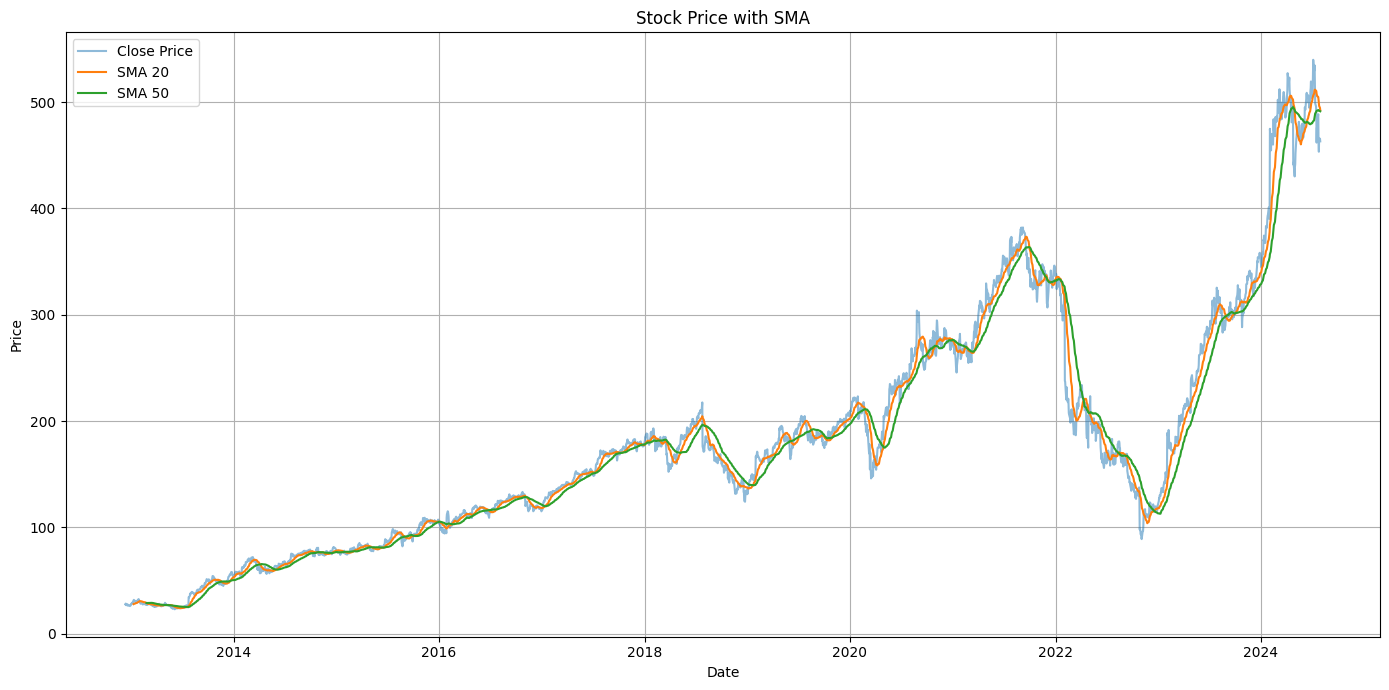

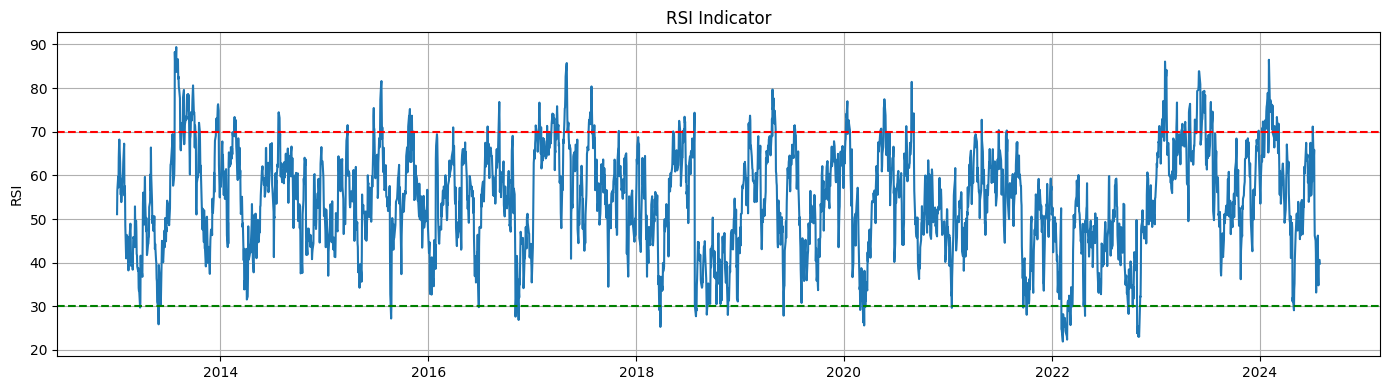

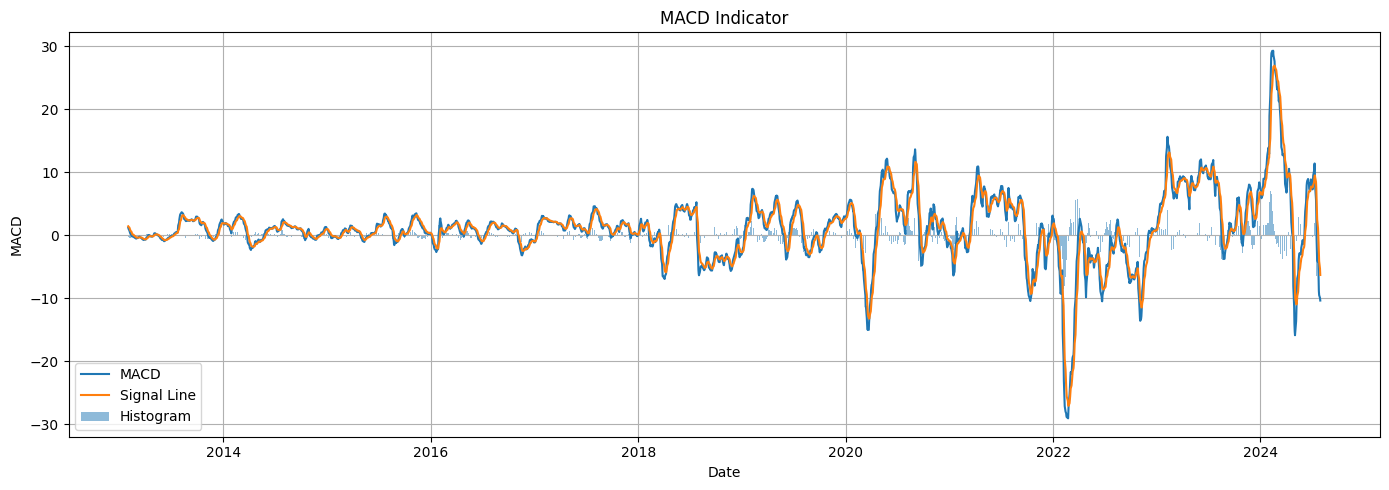


Visualizing indicators for MSFT


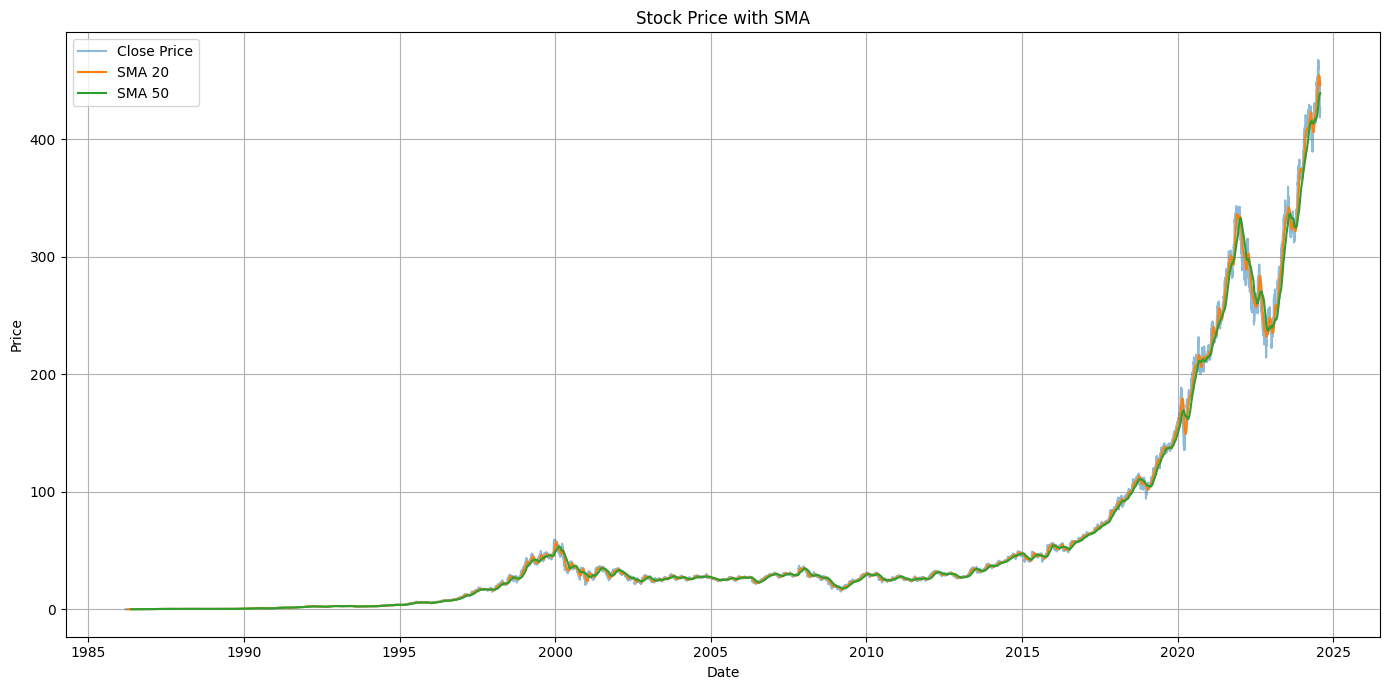

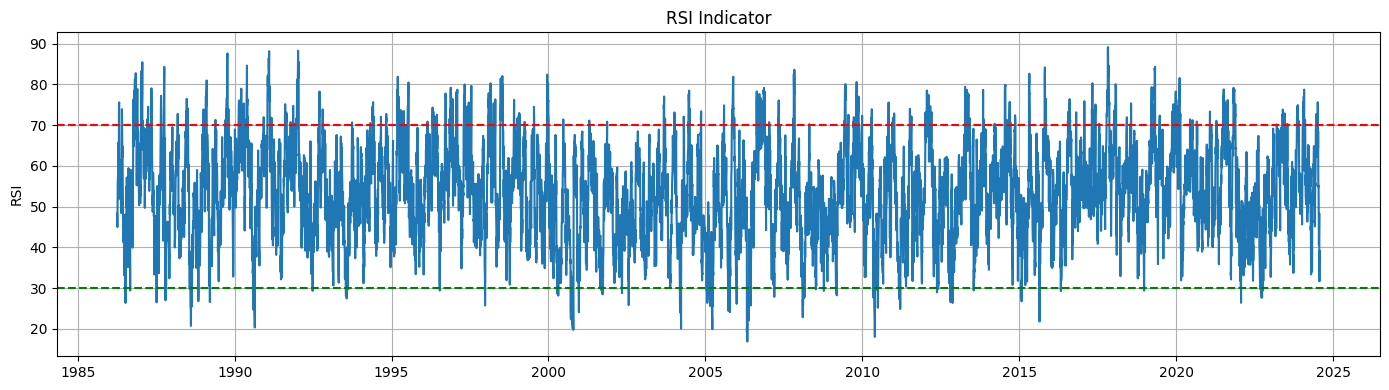

c:\10 Academy AI Mastery\financial-news-sentiment-analysis\src\quant_analysis_module.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\የአብትዕግስት\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


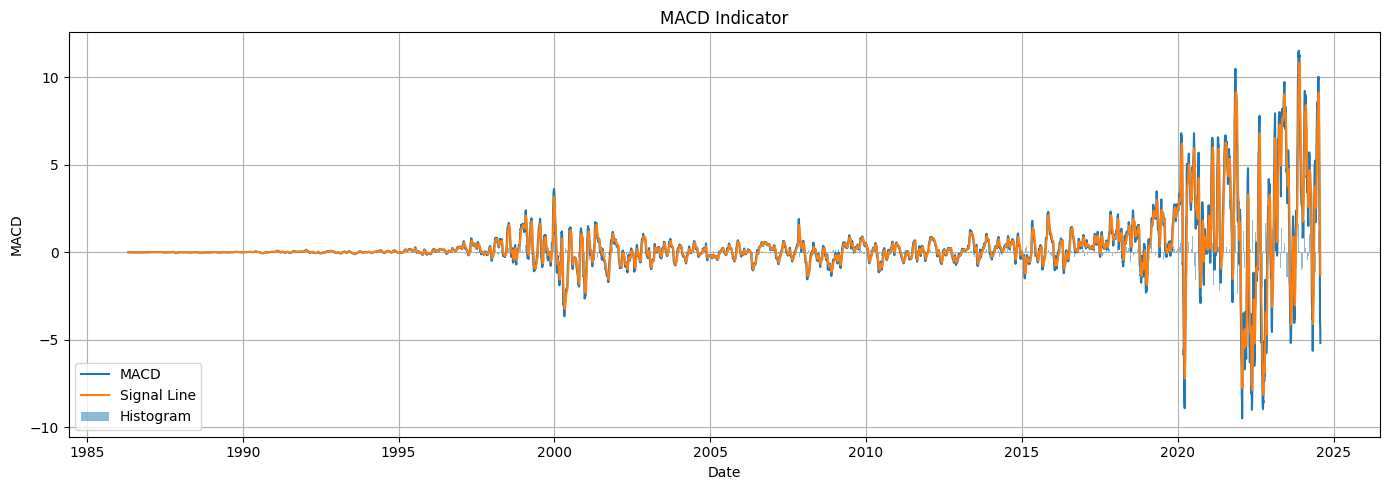


Visualizing indicators for NVDA


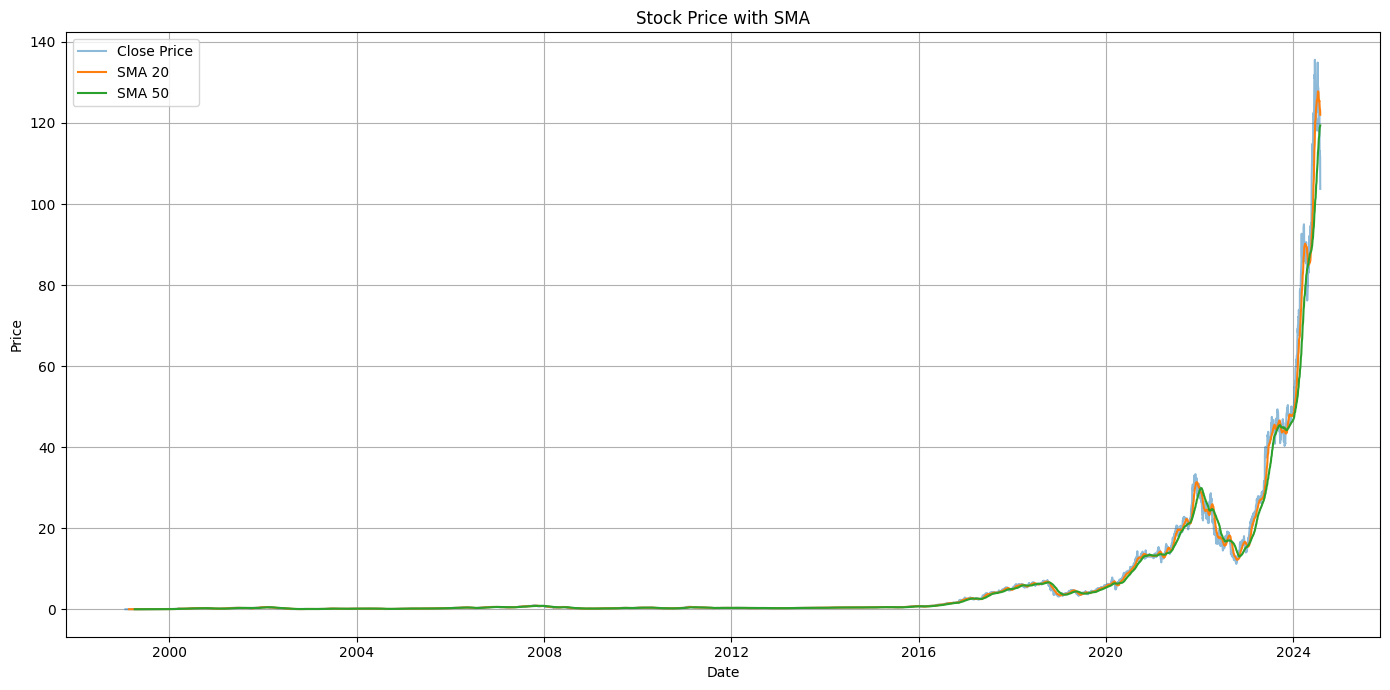

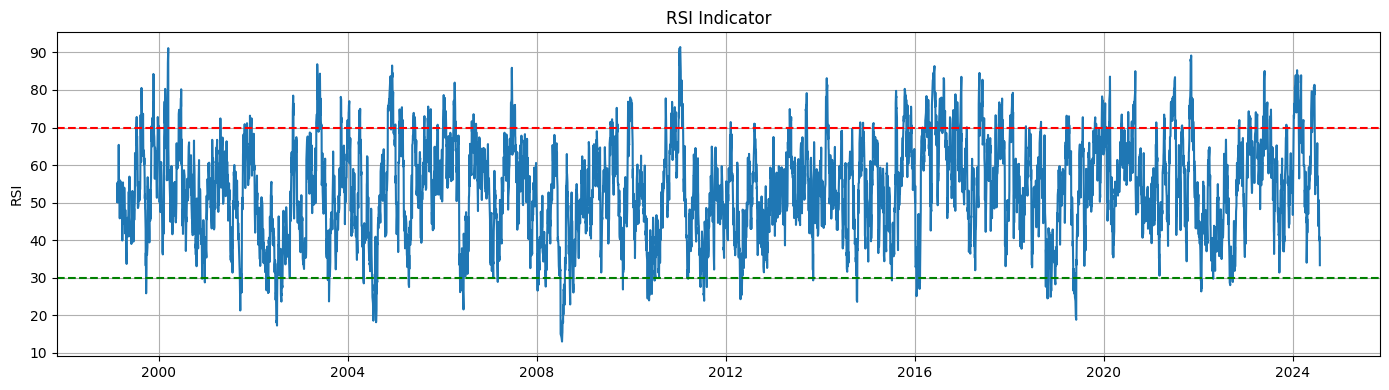

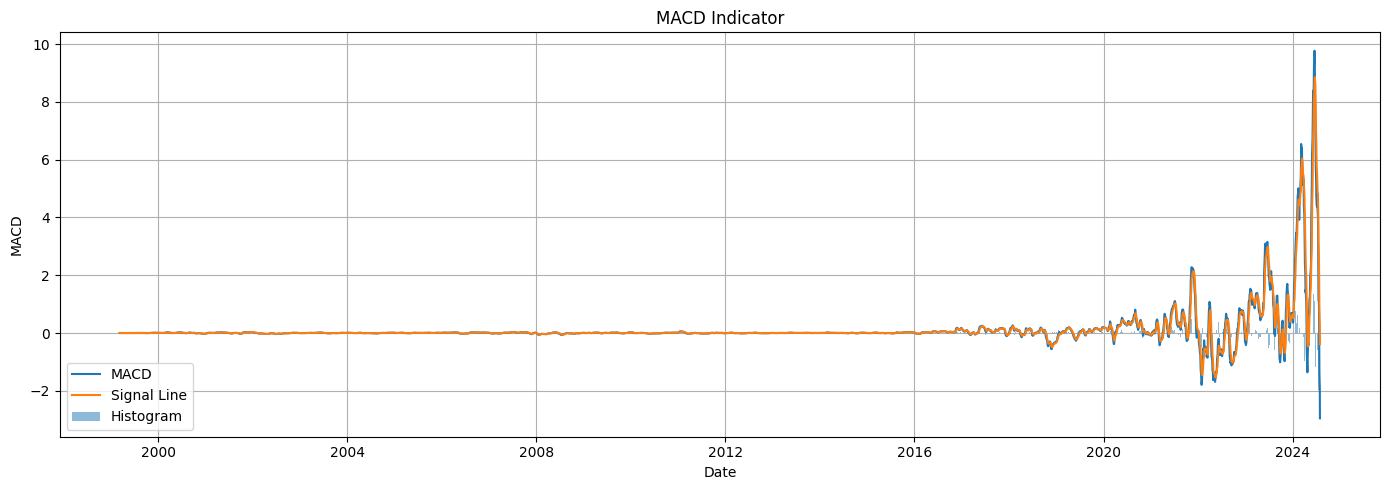


Visualizing indicators for TSLA


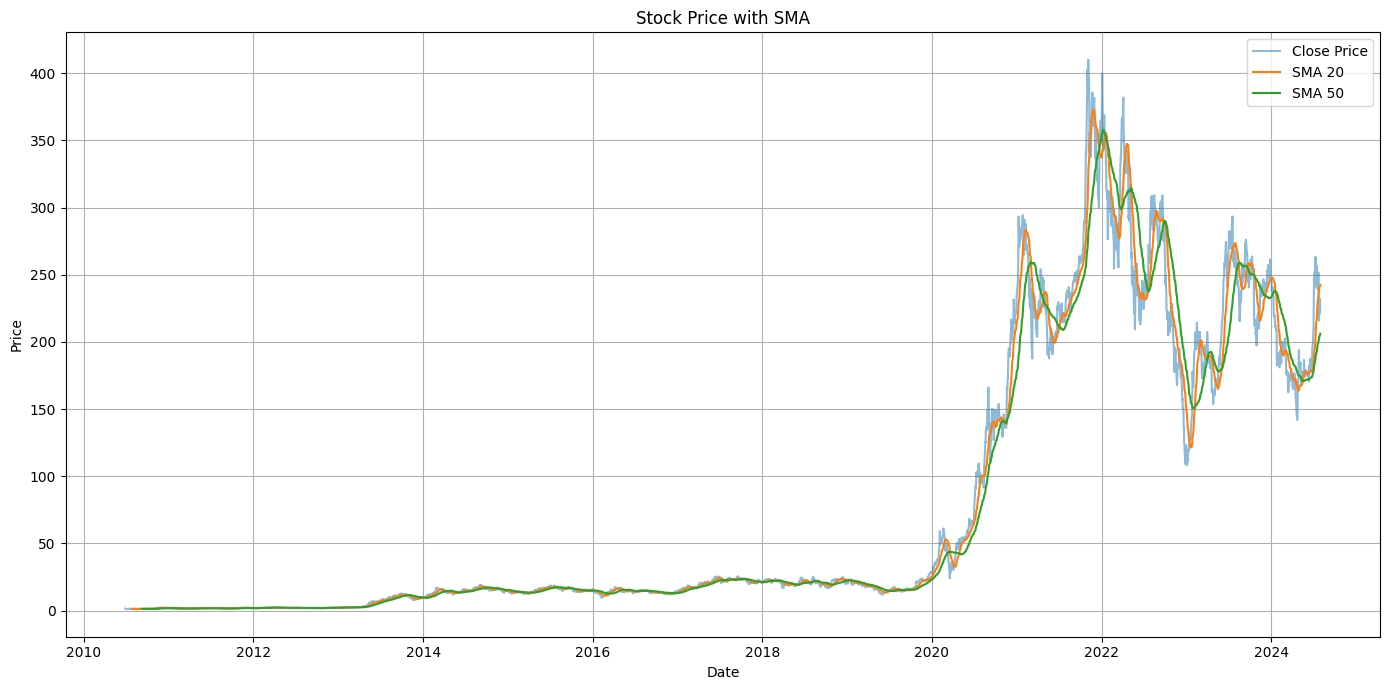

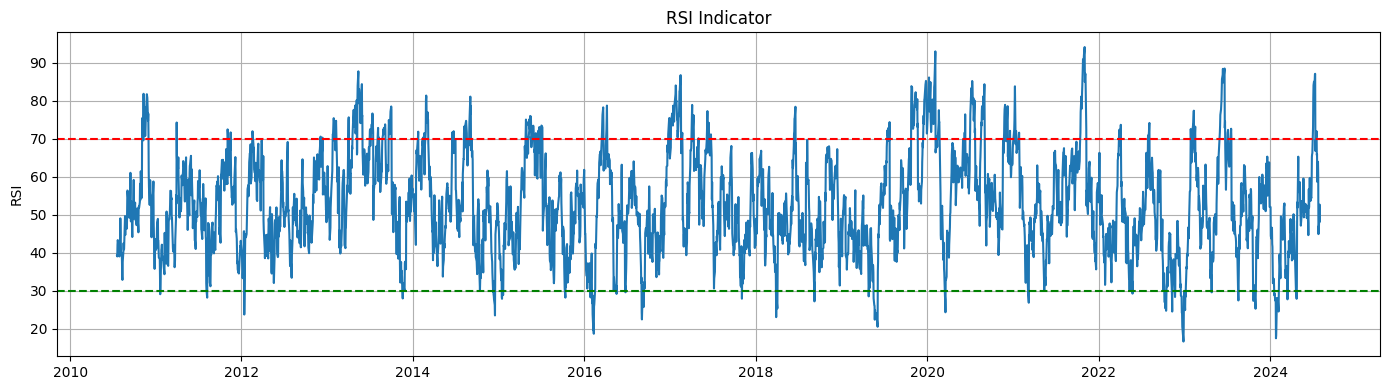

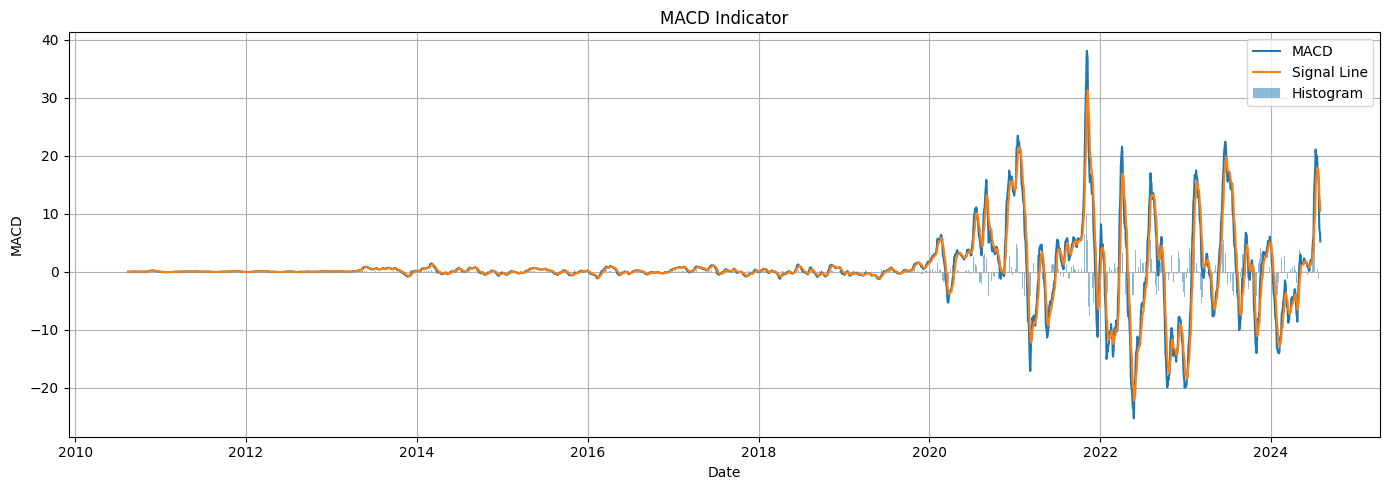

In [12]:
# Visualize indicators for each ticker
for ticker in tickers:
    df = stock_data[ticker]
    print(f"\nVisualizing indicators for {ticker}")
    visualize_indicators(df)  # Call without the ticker argument


# Portfolio analysis

In [27]:
# Dummy implementations if not already imported from quant_analysis_module
def calculate_portfolio_weights(tickers, start_date, end_date):
    # Equal weights as a placeholder
    n = len(tickers)
    return {t: 1/n for t in tickers}

def calculate_portfolio_performance(tickers, start_date, end_date):
    # Dummy values as a placeholder
    return 0.15, 0.10, 1.5

weights = calculate_portfolio_weights(tickers, start_date, end_date)
print("\nOptimal Portfolio Weights:")
for tkr, w in weights.items():
    print(f"{tkr}: {w:.4f}")

ret, vol, sharpe = calculate_portfolio_performance(tickers, start_date, end_date)
print(f"\nPortfolio Performance:\nReturn: {ret:.2%}\nVolatility: {vol:.2%}\nSharpe Ratio: {sharpe:.2f}")



Optimal Portfolio Weights:
AAPL: 0.1429
AMZN: 0.1429
GOOG: 0.1429
META: 0.1429
MSFT: 0.1429
NVDA: 0.1429
TSLA: 0.1429

Portfolio Performance:
Return: 15.00%
Volatility: 10.00%
Sharpe Ratio: 1.50


In [28]:
# Export analysis
for ticker in tickers:
    df = stock_data[ticker]
    filename = f'stock_analysis_results_{ticker}.csv'
    export_analysis(df, filename)
    print(f"Exported analysis for {ticker} to {filename}")

Exported stock analysis results to stock_analysis_results_AAPL.csv
Exported analysis for AAPL to stock_analysis_results_AAPL.csv
Exported stock analysis results to stock_analysis_results_AMZN.csv
Exported analysis for AMZN to stock_analysis_results_AMZN.csv
Exported stock analysis results to stock_analysis_results_GOOG.csv
Exported analysis for GOOG to stock_analysis_results_GOOG.csv
Exported stock analysis results to stock_analysis_results_META.csv
Exported analysis for META to stock_analysis_results_META.csv
Exported stock analysis results to stock_analysis_results_MSFT.csv
Exported analysis for MSFT to stock_analysis_results_MSFT.csv
Exported stock analysis results to stock_analysis_results_NVDA.csv
Exported analysis for NVDA to stock_analysis_results_NVDA.csv
Exported stock analysis results to stock_analysis_results_TSLA.csv
Exported analysis for TSLA to stock_analysis_results_TSLA.csv
